In [66]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.stats as st



read_path = r'~/Downloads/joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [93]:
# 2003: january, february, march, april -> Irakkrieg
filtered_values = np.where((df["date"].dt.year <= 2002)  | ((df["date"].dt.year == 2003) & (df["date"].dt.month <= 5)))
data_war = df.loc[filtered_values]


In [94]:
# regression for each party
x = data_war.index.values.reshape(-1,1)
pred = LinearRegression()
pred.fit(x, data_war[["SPD"]])

LinearRegression()

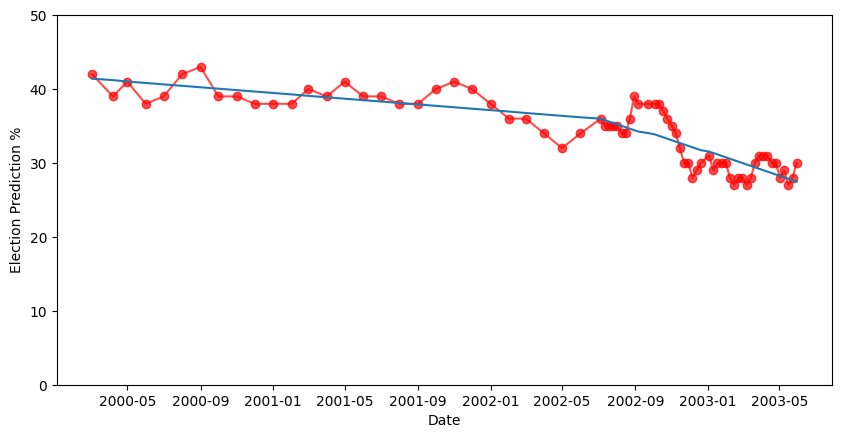

In [95]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war[['date']],pred.predict(x))

In [96]:
# line not fitted well -> polynomial regression
# regression for each party
x_poly = data_war.index.values
poly = PolynomialFeatures(degree=5)
poly_features = poly.fit_transform(x_poly.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data_war[["SPD"]])

LinearRegression()

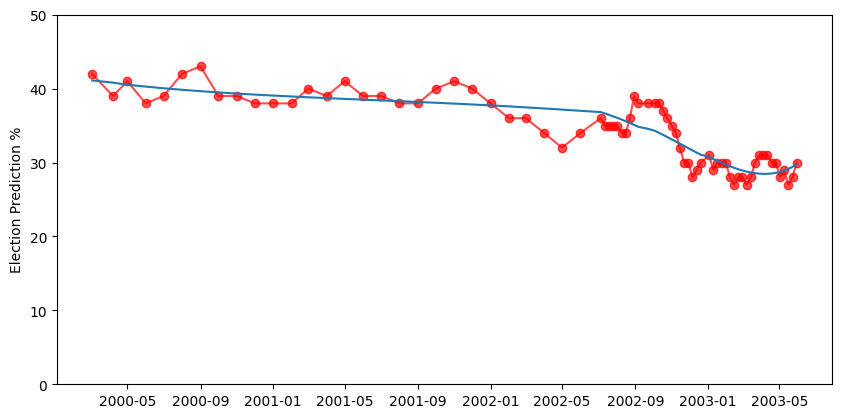

In [97]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war[['date']],poly_reg_model.predict(poly_features))


In [124]:
x = data_war['date'].values
#y = data_war["SPD"].values  
y = poly_reg_model.predict(poly_features).flatten()


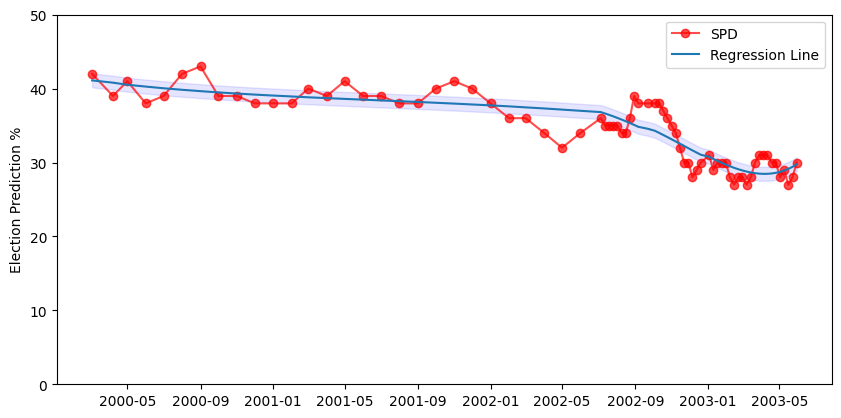

In [125]:
# plots with bootstrap
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-', label='SPD', color='red', alpha=0.7)


ci = 1.95 * np.std(y)/np.sqrt(len(x))



# Plot the regression line
ax1.plot(data_war[['date']], poly_reg_model.predict(poly_features), label='Regression Line')
# Plot the confidence intervals
#ax1.fill_between(data_war['date'], lower_bound, upper_bound, color='blue', alpha=0.2, label='95% Confidence Interval')

ax1.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
plt.legend()
plt.show()